# Sleep Health and Lifestyle Dataset Analysis Report<a href="#Sleep-Health-and-Lifestyle-Dataset-Analysis-Report"
class="anchor-link">¶</a>

Introduction: The Sleep Health and Lifestyle Dataset provides valuable
insights into various factors affecting sleep patterns and overall
lifestyle. With 400 rows and 13 columns, the dataset covers a wide range
of variables including sleep duration, quality of sleep, physical
activity levels, stress levels, BMI categories, cardiovascular health
metrics, and the presence of sleep disorders. This report aims to
analyze and interpret key findings from the dataset through descriptive
statistics and data visualization techniques.

Dataset Overview:

Total Rows: 400 Total Columns: 13 Data Types: Float64, Int64, Object
Missing Values: Present in 'Sleep Disorder' column (155 null values)

Key Features of the Dataset:

Comprehensive Sleep Metrics: The dataset includes variables such as
sleep duration and quality, allowing for the exploration of sleep
patterns and factors influencing sleep.

Lifestyle Factors: Physical activity levels and stress levels are
included, providing insights into the impact of lifestyle on sleep
health.

Cardiovascular Health: Blood pressure and heart rate measurements offer
an understanding of participants' cardiovascular health.

Sleep Disorder Analysis: The presence or absence of sleep disorders such
as Insomnia and Sleep Apnea enables the identification of individuals
with specific sleep-related issues.

In \[1\]:

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import plotly.express as px

In \[2\]:

    df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In \[3\]:

    df.head()

Out\[3\]:

|     | Person ID | Gender | Age | Occupation           | Sleep Duration | Quality of Sleep | Physical Activity Level | Stress Level | BMI Category | Blood Pressure | Heart Rate | Daily Steps | Sleep Disorder |
|-----|-----------|--------|-----|----------------------|----------------|------------------|-------------------------|--------------|--------------|----------------|------------|-------------|----------------|
| 0   | 1         | Male   | 27  | Software Engineer    | 6.1            | 6                | 42                      | 6            | Overweight   | 126/83         | 77         | 4200        | NaN            |
| 1   | 2         | Male   | 28  | Doctor               | 6.2            | 6                | 60                      | 8            | Normal       | 125/80         | 75         | 10000       | NaN            |
| 2   | 3         | Male   | 28  | Doctor               | 6.2            | 6                | 60                      | 8            | Normal       | 125/80         | 75         | 10000       | NaN            |
| 3   | 4         | Male   | 28  | Sales Representative | 5.9            | 4                | 30                      | 8            | Obese        | 140/90         | 85         | 3000        | Sleep Apnea    |
| 4   | 5         | Male   | 28  | Sales Representative | 5.9            | 4                | 30                      | 8            | Obese        | 140/90         | 85         | 3000        | Sleep Apnea    |

In \[4\]:

    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 374 entries, 0 to 373
    Data columns (total 13 columns):
     #   Column                   Non-Null Count  Dtype  
    ---  ------                   --------------  -----  
     0   Person ID                374 non-null    int64  
     1   Gender                   374 non-null    object 
     2   Age                      374 non-null    int64  
     3   Occupation               374 non-null    object 
     4   Sleep Duration           374 non-null    float64
     5   Quality of Sleep         374 non-null    int64  
     6   Physical Activity Level  374 non-null    int64  
     7   Stress Level             374 non-null    int64  
     8   BMI Category             374 non-null    object 
     9   Blood Pressure           374 non-null    object 
     10  Heart Rate               374 non-null    int64  
     11  Daily Steps              374 non-null    int64  
     12  Sleep Disorder           155 non-null    object 
    dtypes: float64(1), int64(7), object(5)
    memory usage: 38.1+ KB

In \[5\]:

    df.drop("Person ID",axis=1,inplace=True)

In \[6\]:

    df.isnull().sum()

Out\[6\]:

    Gender                       0
    Age                          0
    Occupation                   0
    Sleep Duration               0
    Quality of Sleep             0
    Physical Activity Level      0
    Stress Level                 0
    BMI Category                 0
    Blood Pressure               0
    Heart Rate                   0
    Daily Steps                  0
    Sleep Disorder             219
    dtype: int64

In \[7\]:

    print(df['Sleep Disorder'].value_counts())

    Sleep Disorder
    Sleep Apnea    78
    Insomnia       77
    Name: count, dtype: int64

# variables selected :<a href="#variables-selected-:" class="anchor-link">¶</a>

1.  Gender
2.  quality of sleep
3.  BMI category

In \[8\]:

    ## bar plot for BMI category

    plt.figure(figsize=(8, 6))
    bmi_category_counts = df['BMI Category'].value_counts()
    bmi_category_counts.plot(kind='bar', color=['lightcoral', 'gold', 'lightblue'])
    plt.title('BMI Category Distribution')
    plt.xlabel('BMI Category')
    plt.ylabel('Count')
    plt.show()

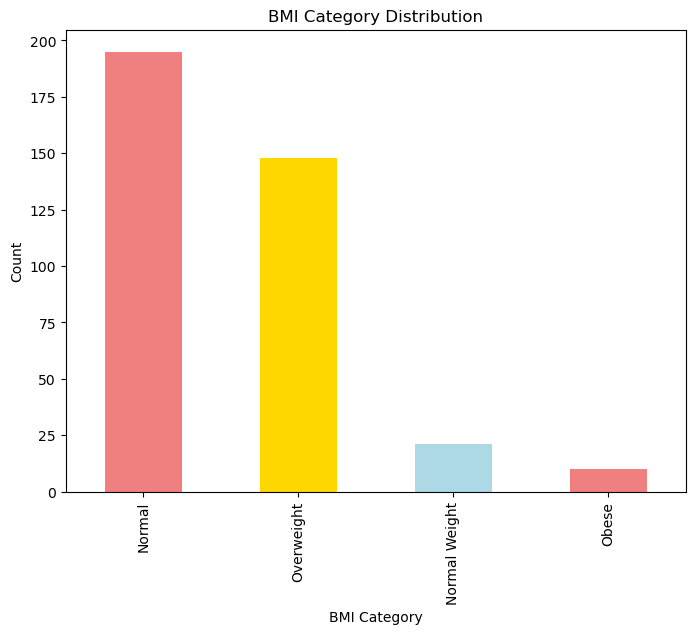

In \[9\]:

    plt.figure(figsize=(8, 6))
    gender_counts = df['Gender'].value_counts()
    gender_counts.plot(kind='bar', color=['lightcoral', 'blue'])
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

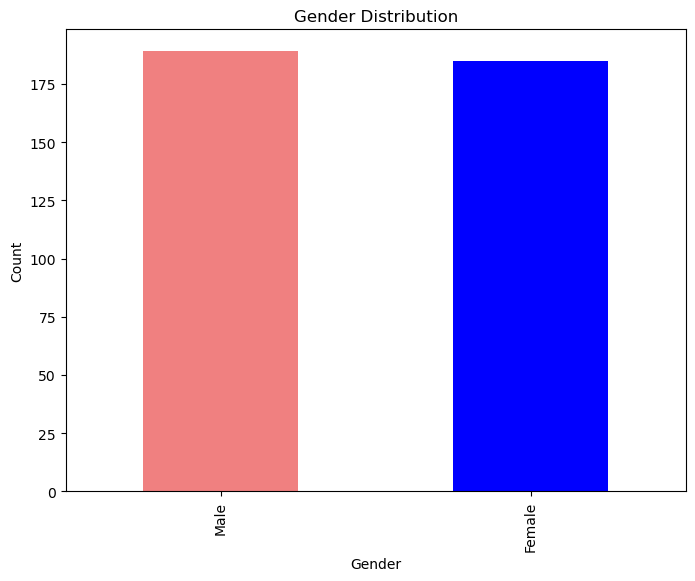

In \[10\]:

    # pie chart for Gender
    gender_count = df["Gender"].value_counts().reset_index()
    fig = px.pie(gender_count,values='count',names="Gender")
    fig.show()

In \[11\]:

    # pie chart for Gender
    bmi_count = df["BMI Category"].value_counts().reset_index()
    fig = px.pie(bmi_count,values='count',names="BMI Category")
    fig.show()

In \[12\]:

    from pandas.plotting import scatter_matrix
    features = df.columns
    plt.figure(figsize=(12, 12))
    scatter_matrix(df[features], figsize=(15, 15), diagonal='kde')
    plt.show()

    <Figure size 1200x1200 with 0 Axes>

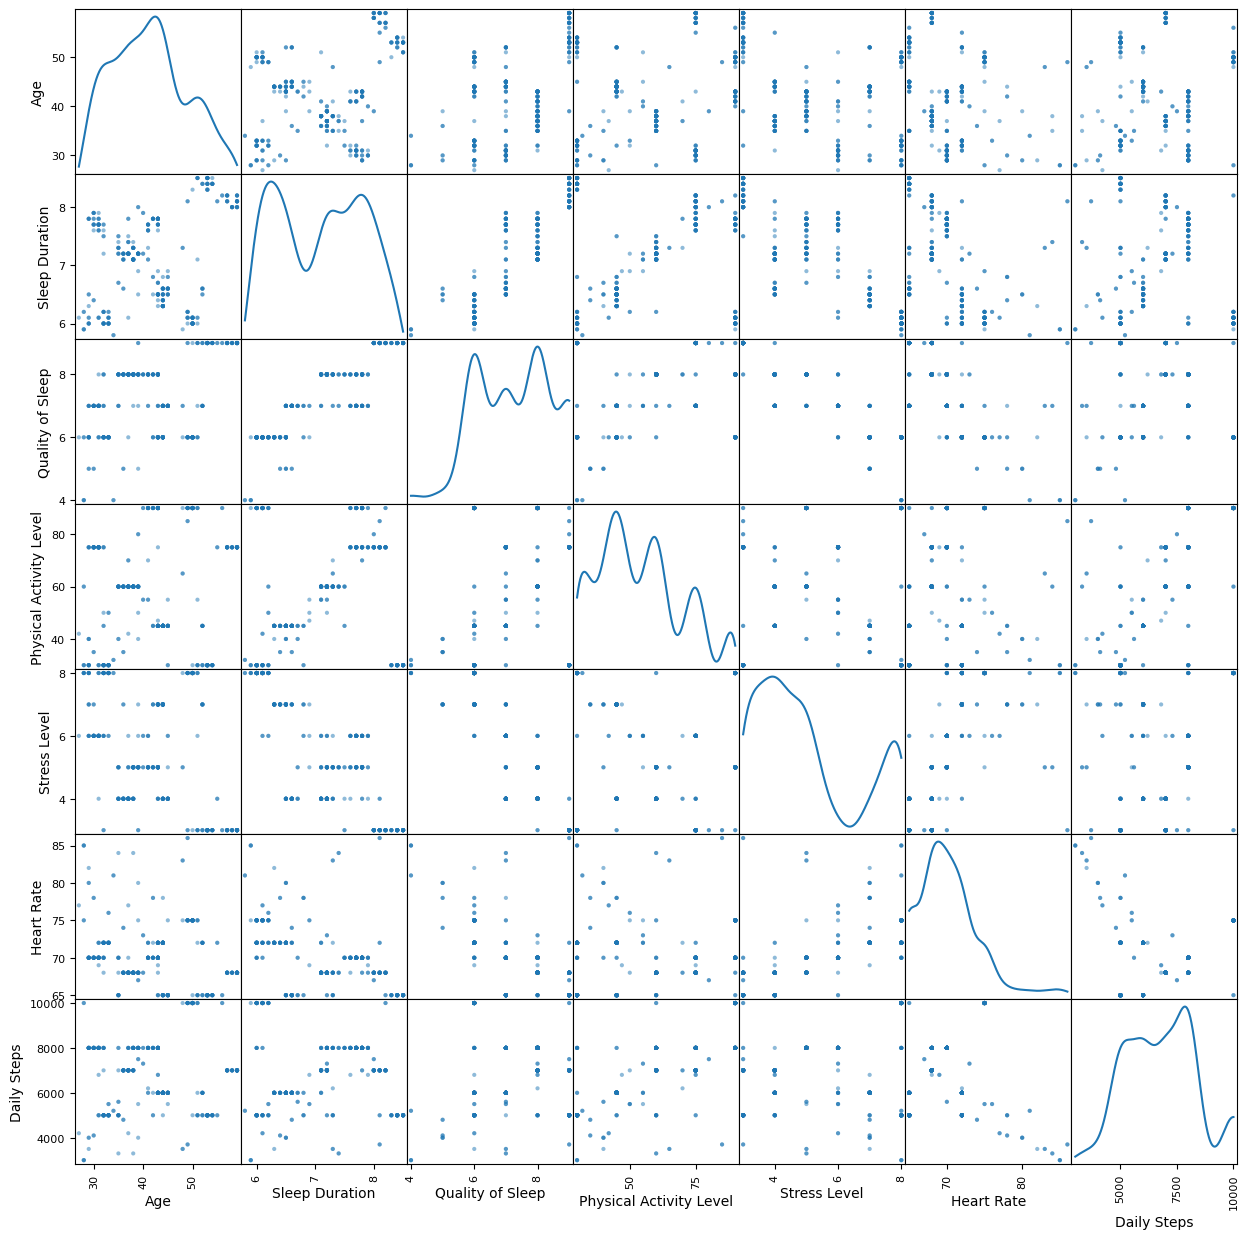

In \[13\]:

    df = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
    df = df.rename(columns={0: 'BloodPressure_Upper', 1: 'BloodPressure_Lower'})
    df['BloodPressure_Upper'] = df['BloodPressure_Upper'].astype(float)
    df['BloodPressure_Lower'] = df['BloodPressure_Lower'].astype(float)

In \[14\]:

    from sklearn import preprocessing 
    label_encoder = preprocessing.LabelEncoder()
    df['Gender'] = label_encoder.fit_transform(df['Gender'])
    df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
    df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
    df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])
    df.head()

Out\[14\]:

|     | Gender | Age | Occupation | Sleep Duration | Quality of Sleep | Physical Activity Level | Stress Level | BMI Category | Heart Rate | Daily Steps | Sleep Disorder | BloodPressure_Upper | BloodPressure_Lower |
|-----|--------|-----|------------|----------------|------------------|-------------------------|--------------|--------------|------------|-------------|----------------|---------------------|---------------------|
| 0   | 1      | 27  | 9          | 6.1            | 6                | 42                      | 6            | 3            | 77         | 4200        | 2              | 126.0               | 83.0                |
| 1   | 1      | 28  | 1          | 6.2            | 6                | 60                      | 8            | 0            | 75         | 10000       | 2              | 125.0               | 80.0                |
| 2   | 1      | 28  | 1          | 6.2            | 6                | 60                      | 8            | 0            | 75         | 10000       | 2              | 125.0               | 80.0                |
| 3   | 1      | 28  | 6          | 5.9            | 4                | 30                      | 8            | 2            | 85         | 3000        | 1              | 140.0               | 90.0                |
| 4   | 1      | 28  | 6          | 5.9            | 4                | 30                      | 8            | 2            | 85         | 3000        | 1              | 140.0               | 90.0                |

In \[15\]:

    df.corr()

Out\[15\]:

|                         | Gender    | Age       | Occupation | Sleep Duration | Quality of Sleep | Physical Activity Level | Stress Level | BMI Category | Heart Rate | Daily Steps | Sleep Disorder | BloodPressure_Upper | BloodPressure_Lower |
|-------------------------|-----------|-----------|------------|----------------|------------------|-------------------------|--------------|--------------|------------|-------------|----------------|---------------------|---------------------|
| Gender                  | 1.000000  | -0.596358 | -0.219113  | -0.121579      | -0.291366        | 0.001454                | 0.396018     | -0.352060    | 0.217105   | -0.014509   | 0.161131       | -0.210527           | -0.268378           |
| Age                     | -0.596358 | 1.000000  | 0.231188   | 0.344709       | 0.473734         | 0.178993                | -0.422344    | 0.511329     | -0.225606  | 0.057973    | -0.303962      | 0.605878            | 0.593839            |
| Occupation              | -0.219113 | 0.231188  | 1.000000   | -0.325775      | -0.278071        | -0.103660               | 0.021123     | 0.699504     | 0.043928   | -0.105877   | -0.600787      | 0.518561            | 0.521835            |
| Sleep Duration          | -0.121579 | 0.344709  | -0.325775  | 1.000000       | 0.883213         | 0.212360                | -0.811023    | -0.376358    | -0.516455  | -0.039533   | 0.382045       | -0.180406           | -0.166570           |
| Quality of Sleep        | -0.291366 | 0.473734  | -0.278071  | 0.883213       | 1.000000         | 0.192896                | -0.898752    | -0.312562    | -0.659865  | 0.016791    | 0.357477       | -0.121632           | -0.110151           |
| Physical Activity Level | 0.001454  | 0.178993  | -0.103660  | 0.212360       | 0.192896         | 1.000000                | -0.034134    | 0.077156     | 0.136971   | 0.772723    | 0.109225       | 0.265416            | 0.382651            |
| Stress Level            | 0.396018  | -0.422344 | 0.021123   | -0.811023      | -0.898752        | -0.034134               | 1.000000     | 0.163895     | 0.670026   | 0.186829    | -0.181296      | 0.102818            | 0.091811            |
| BMI Category            | -0.352060 | 0.511329  | 0.699504   | -0.376358      | -0.312562        | 0.077156                | 0.163895     | 1.000000     | 0.295585   | -0.005059   | -0.725786      | 0.714057            | 0.750869            |
| Heart Rate              | 0.217105  | -0.225606 | 0.043928   | -0.516455      | -0.659865        | 0.136971                | 0.670026     | 0.295585     | 1.000000   | -0.030309   | -0.220913      | 0.294143            | 0.271092            |
| Daily Steps             | -0.014509 | 0.057973  | -0.105877  | -0.039533      | 0.016791         | 0.772723                | 0.186829     | -0.005059    | -0.030309  | 1.000000    | 0.161275       | 0.103342            | 0.241986            |
| Sleep Disorder          | 0.161131  | -0.303962 | -0.600787  | 0.382045       | 0.357477         | 0.109225                | -0.181296    | -0.725786    | -0.220913  | 0.161275    | 1.000000       | -0.539280           | -0.523490           |
| BloodPressure_Upper     | -0.210527 | 0.605878  | 0.518561   | -0.180406      | -0.121632        | 0.265416                | 0.102818     | 0.714057     | 0.294143   | 0.103342    | -0.539280      | 1.000000            | 0.972885            |
| BloodPressure_Lower     | -0.268378 | 0.593839  | 0.521835   | -0.166570      | -0.110151        | 0.382651                | 0.091811     | 0.750869     | 0.271092   | 0.241986    | -0.523490      | 0.972885            | 1.000000            |

In \[16\]:

    import seaborn as sns
    def corr_vis(corr) :
        mask = np.zeros_like(corr)
        mask[np.triu_indices_from(mask)] = True
        with sns.axes_style("white"):
            f, ax = plt.subplots(figsize=(10, 7))
            g = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, cmap='coolwarm')
            g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 10)

    num_corr = df.corr()
    corr_vis(df.corr())

    C:\Users\manip\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

    Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior

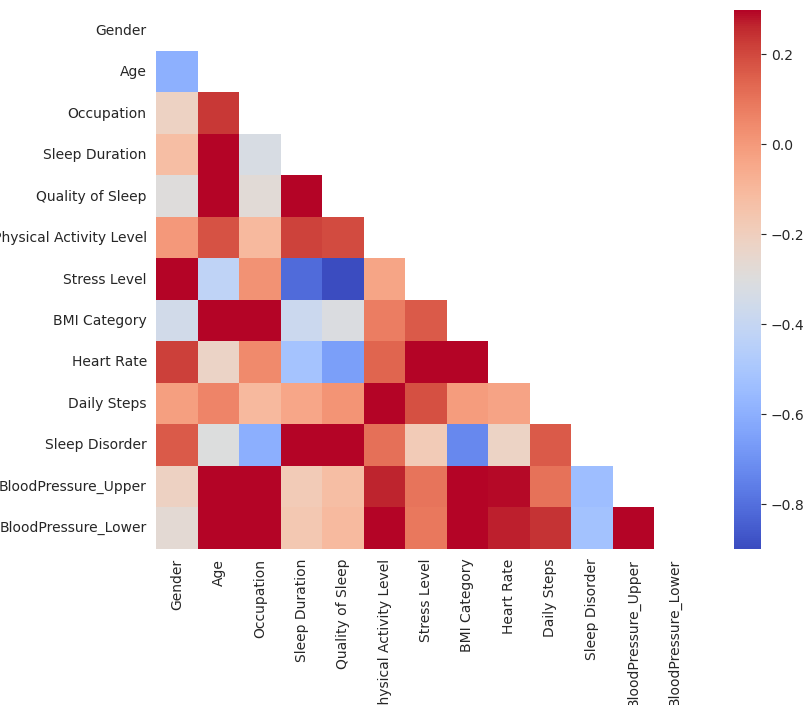

In \[17\]:

    # Box plot: Gender vs Quality of Sleep
    plt.figure(figsize=(8, 6))
    df.boxplot(column='Quality of Sleep', by='Gender', grid=False, patch_artist=True)
    plt.title('Gender vs Quality of Sleep')
    plt.suptitle('')  # Removing the default super title
    plt.xlabel('Gender')
    plt.ylabel('Quality of Sleep')
    plt.show()

    # Box plot: BMI Category vs Quality of Sleep
    plt.figure(figsize=(8, 6))
    df.boxplot(column='Quality of Sleep', by='BMI Category', grid=False, patch_artist=True)
    plt.title('BMI Category vs Quality of Sleep')
    plt.suptitle('')
    plt.xlabel('BMI Category')
    plt.ylabel('Quality of Sleep')
    plt.show()

    <Figure size 800x600 with 0 Axes>

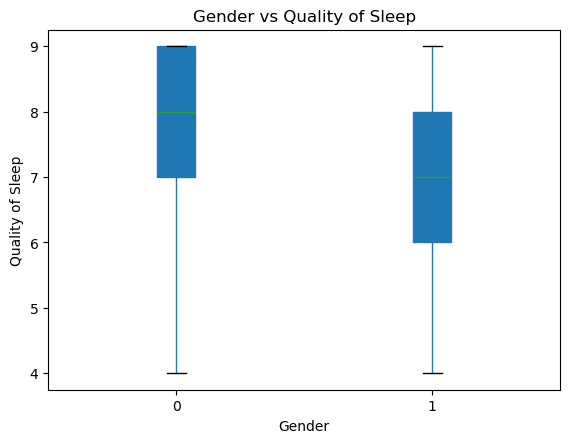

    <Figure size 800x600 with 0 Axes>

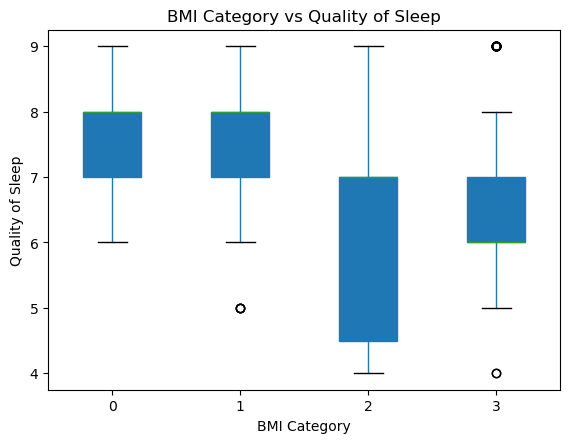

In \[18\]:

    import seaborn as sns
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Quality of Sleep'], bins=10, kde=True, color='lightgreen')
    plt.title('Histogram of Quality of Sleep')
    plt.xlabel('Quality of Sleep')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

    C:\Users\manip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

    use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

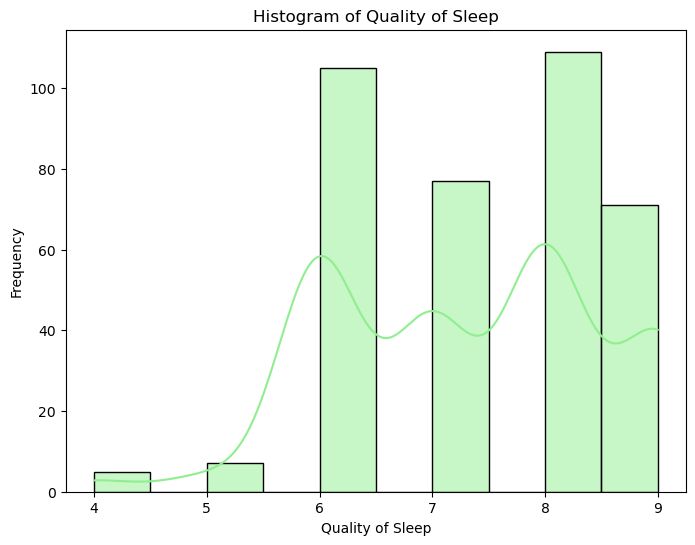

In \[19\]:

    plt.figure(figsize=(8, 6))
    sns.histplot(df['Sleep Duration'], bins=10, kde=True, color='salmon')
    plt.title('Histogram of Sleep Duration')
    plt.xlabel('Sleep Duration')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

    C:\Users\manip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

    use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

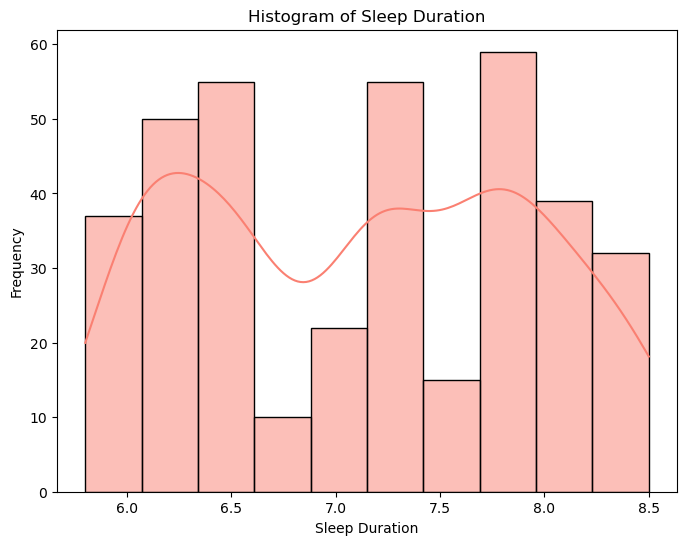

In \[20\]:

    # Import necessary libraries
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import confusion_matrix, accuracy_score

In \[21\]:

    df.dropna()

Out\[21\]:

|     | Gender | Age | Occupation | Sleep Duration | Quality of Sleep | Physical Activity Level | Stress Level | BMI Category | Heart Rate | Daily Steps | Sleep Disorder | BloodPressure_Upper | BloodPressure_Lower |
|-----|--------|-----|------------|----------------|------------------|-------------------------|--------------|--------------|------------|-------------|----------------|---------------------|---------------------|
| 0   | 1      | 27  | 9          | 6.1            | 6                | 42                      | 6            | 3            | 77         | 4200        | 2              | 126.0               | 83.0                |
| 1   | 1      | 28  | 1          | 6.2            | 6                | 60                      | 8            | 0            | 75         | 10000       | 2              | 125.0               | 80.0                |
| 2   | 1      | 28  | 1          | 6.2            | 6                | 60                      | 8            | 0            | 75         | 10000       | 2              | 125.0               | 80.0                |
| 3   | 1      | 28  | 6          | 5.9            | 4                | 30                      | 8            | 2            | 85         | 3000        | 1              | 140.0               | 90.0                |
| 4   | 1      | 28  | 6          | 5.9            | 4                | 30                      | 8            | 2            | 85         | 3000        | 1              | 140.0               | 90.0                |
| ... | ...    | ... | ...        | ...            | ...              | ...                     | ...          | ...          | ...        | ...         | ...            | ...                 | ...                 |
| 369 | 0      | 59  | 5          | 8.1            | 9                | 75                      | 3            | 3            | 68         | 7000        | 1              | 140.0               | 95.0                |
| 370 | 0      | 59  | 5          | 8.0            | 9                | 75                      | 3            | 3            | 68         | 7000        | 1              | 140.0               | 95.0                |
| 371 | 0      | 59  | 5          | 8.1            | 9                | 75                      | 3            | 3            | 68         | 7000        | 1              | 140.0               | 95.0                |
| 372 | 0      | 59  | 5          | 8.1            | 9                | 75                      | 3            | 3            | 68         | 7000        | 1              | 140.0               | 95.0                |
| 373 | 0      | 59  | 5          | 8.1            | 9                | 75                      | 3            | 3            | 68         | 7000        | 1              | 140.0               | 95.0                |

374 rows × 13 columns

In \[22\]:

    df.isnull().sum()

Out\[22\]:

    Gender                     0
    Age                        0
    Occupation                 0
    Sleep Duration             0
    Quality of Sleep           0
    Physical Activity Level    0
    Stress Level               0
    BMI Category               0
    Heart Rate                 0
    Daily Steps                0
    Sleep Disorder             0
    BloodPressure_Upper        0
    BloodPressure_Lower        0
    dtype: int64

In \[23\]:

    ## variables to be selected :
    # Step 1: Prepare the data (Features and Target)
    # In this case, we predict Sleep Disorder (convert to binary: 0 - None, 1 - has disorder)
    df['Sleep Disorder'] = df['Sleep Disorder'].apply(lambda x: 0 if x == 'Sleep Apnea' else 1)

In \[24\]:

    # Select features and target
    # We are adding 'Heart Rate' to the feature set now
    X = df[['Sleep Duration', 'Stress Level', 'Physical Activity Level', 'Heart Rate']]  # Feature columns
    y = df['Sleep Disorder']   # Target column (labels)

In \[25\]:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In \[26\]:

    logistic_model = LogisticRegression()
    logistic_model.fit(X_train, y_train)

    ---------------------------------------------------------------------------
    ValueError                                Traceback (most recent call last)
    Cell In[26], line 2
          1 logistic_model = LogisticRegression()
    ----> 2 logistic_model.fit(X_train, y_train)

    File ~\anaconda3\Lib\site-packages\sklearn\base.py:1151, in _fit_context.<locals>.decorator.<locals>.wrapper(estimator, *args, **kwargs)
       1144     estimator._validate_params()
       1146 with config_context(
       1147     skip_parameter_validation=(
       1148         prefer_skip_nested_validation or global_skip_validation
       1149     )
       1150 ):
    -> 1151     return fit_method(estimator, *args, **kwargs)

    File ~\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1252, in LogisticRegression.fit(self, X, y, sample_weight)
       1250 classes_ = self.classes_
       1251 if n_classes < 2:
    -> 1252     raise ValueError(
       1253         "This solver needs samples of at least 2 classes"
       1254         " in the data, but the data contains only one"
       1255         " class: %r"
       1256         % classes_[0]
       1257     )
       1259 if len(self.classes_) == 2:
       1260     n_classes = 1

    ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In \[ \]: